In [0]:
import pandas as pd #to work with csv files and data frames
import numpy as np  #to work with array
import statsmodels.api as sm # is a Python module that provides classes and functions for the estimation of many different statistical models
import scipy.stats as st #This module contains a large number of probability distributions as well as a growing library of statistical functions
import matplotlib.pyplot as plt #to create chart
import seaborn as sn # is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
from sklearn.metrics import confusion_matrix #used to evaluate the quality of the output of a classifier
import matplotlib.mlab as mlab #Numerical python functions written for compatibility with MATLAB commands with the same names
from pandas import DataFrame
%matplotlib inline

In [15]:
#Data preparation : it means format and engineer the data into the optimal format
heart_df=pd.read_csv('/content/values.csv')
heart_df.drop(['education'],axis=1,inplace=True) #axis : int or axis name Whether to drop labels from the index (0 / ‘index’) or columns (1 / ‘columns’)  
#inplace : bool, default False If True, do operation inplace and return None.
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [19]:
heart_df.rename(columns={'male':'sex_male'},inplace=True)
heart_df.head()

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [21]:
#Missing value
heart_df.isnull().sum()

sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [25]:
count=0
for i in heart_df.isnull().sum(axis=1):
  if i > 0:
       count=count+1
  print('Total number of rows with missing value is', count)
  print('since its only',round((count/len(heart_df.index))*100),'percent of the entire dataset the rows with missing values are excluded')
  


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
since its only 4 percent of the entire dataset the rows with missing values are excluded
Total number of rows with missing value is 190
since its only 4 percent of the entire dataset the rows with missing values are excluded
Total number of rows with missing value is 190
since its only 4 percent of the entire dataset the rows with missing values are excluded
Total number of rows with missing value is 190
since its only 4 percent of the entire dataset the rows with missing values are excluded
Total number of rows with missing value is 191
since its only 5 percent of the entire dataset the rows with missing values are excluded
Total number of rows with missing value is 191
since its only 5 percent of the entire dataset the rows with missing values are excluded
Total number of rows with missing value is 191
since its only 5 percent of the entire dataset the rows with missing values are excluded
Total number of r

In [0]:
heart_df.dropna(axis=0,inplace=True)

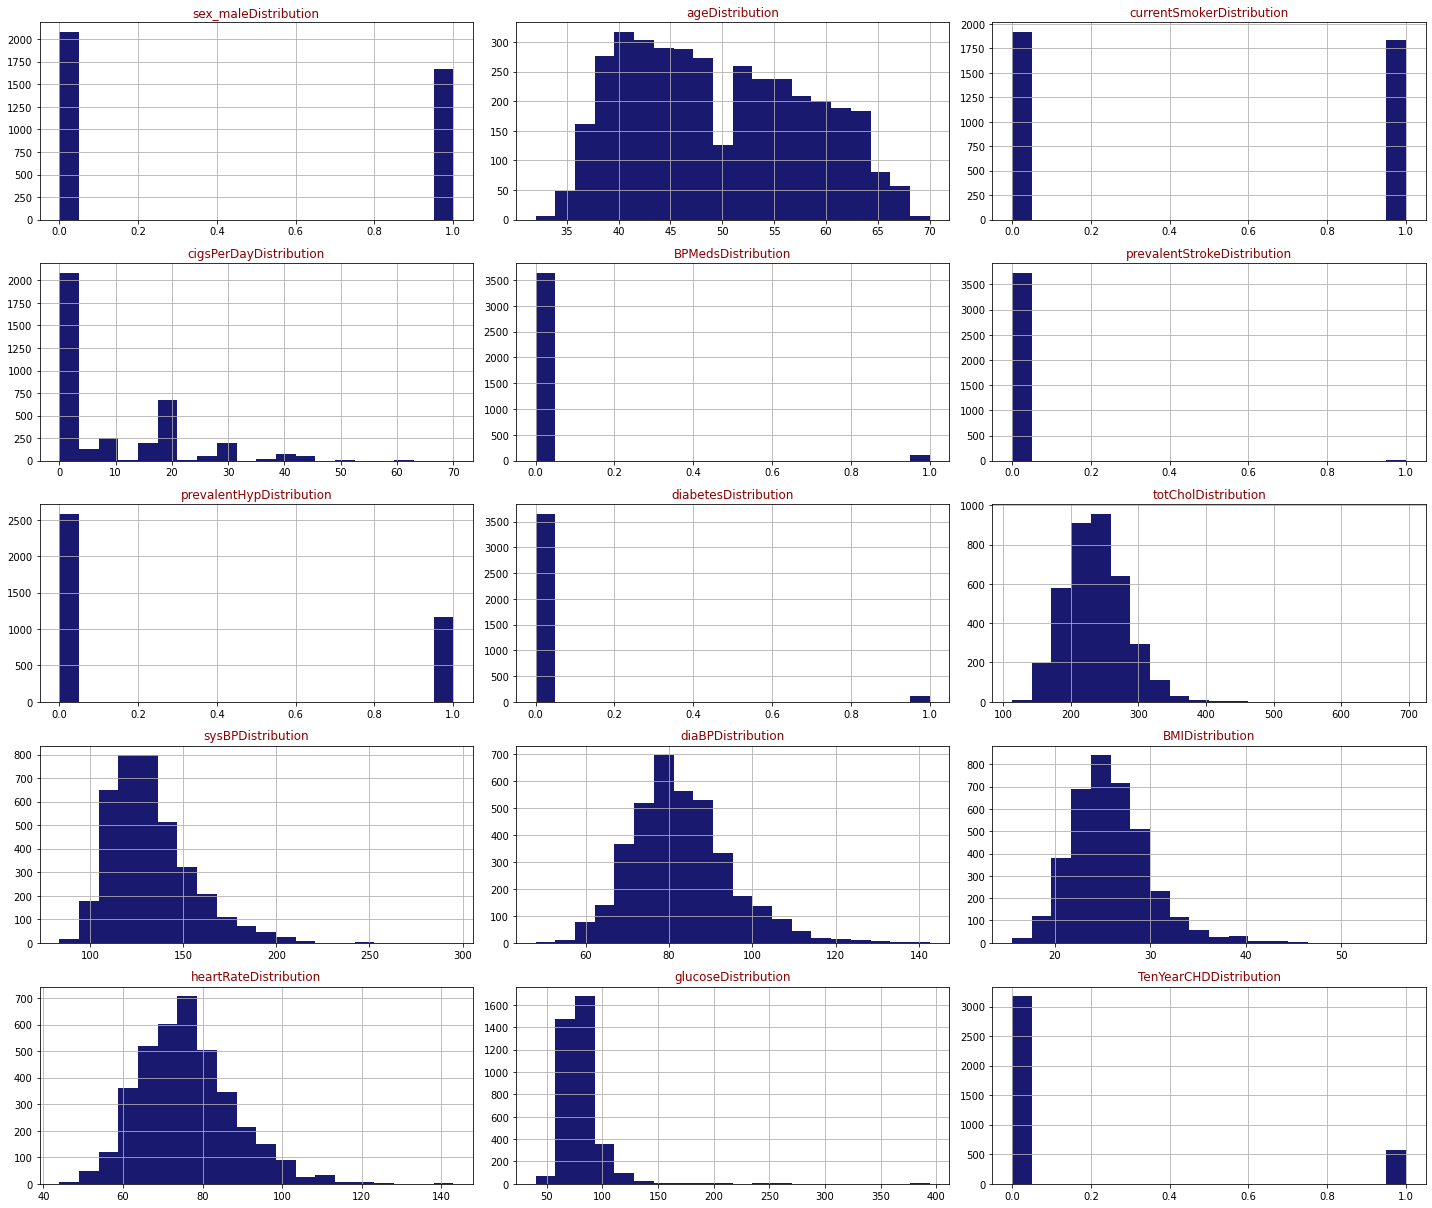

In [35]:
#Exploratory Analysis
def draw_histograms(dataframe, features, rows,cols):
  fig=plt.figure(figsize=(20,20))
  for i, feature in enumerate (features):
    ax=fig.add_subplot(rows,cols,i+1)
    dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
    ax.set_title(feature+"Distribution",color='DarkRed')
    
  fig.tight_layout()
  plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [37]:
heart_df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

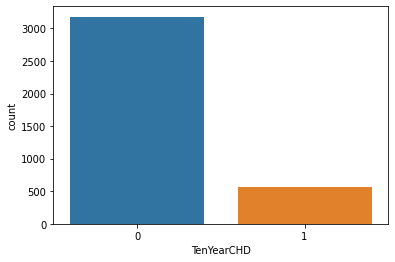

In [40]:
sn.countplot(x='TenYearCHD',data=heart_df)

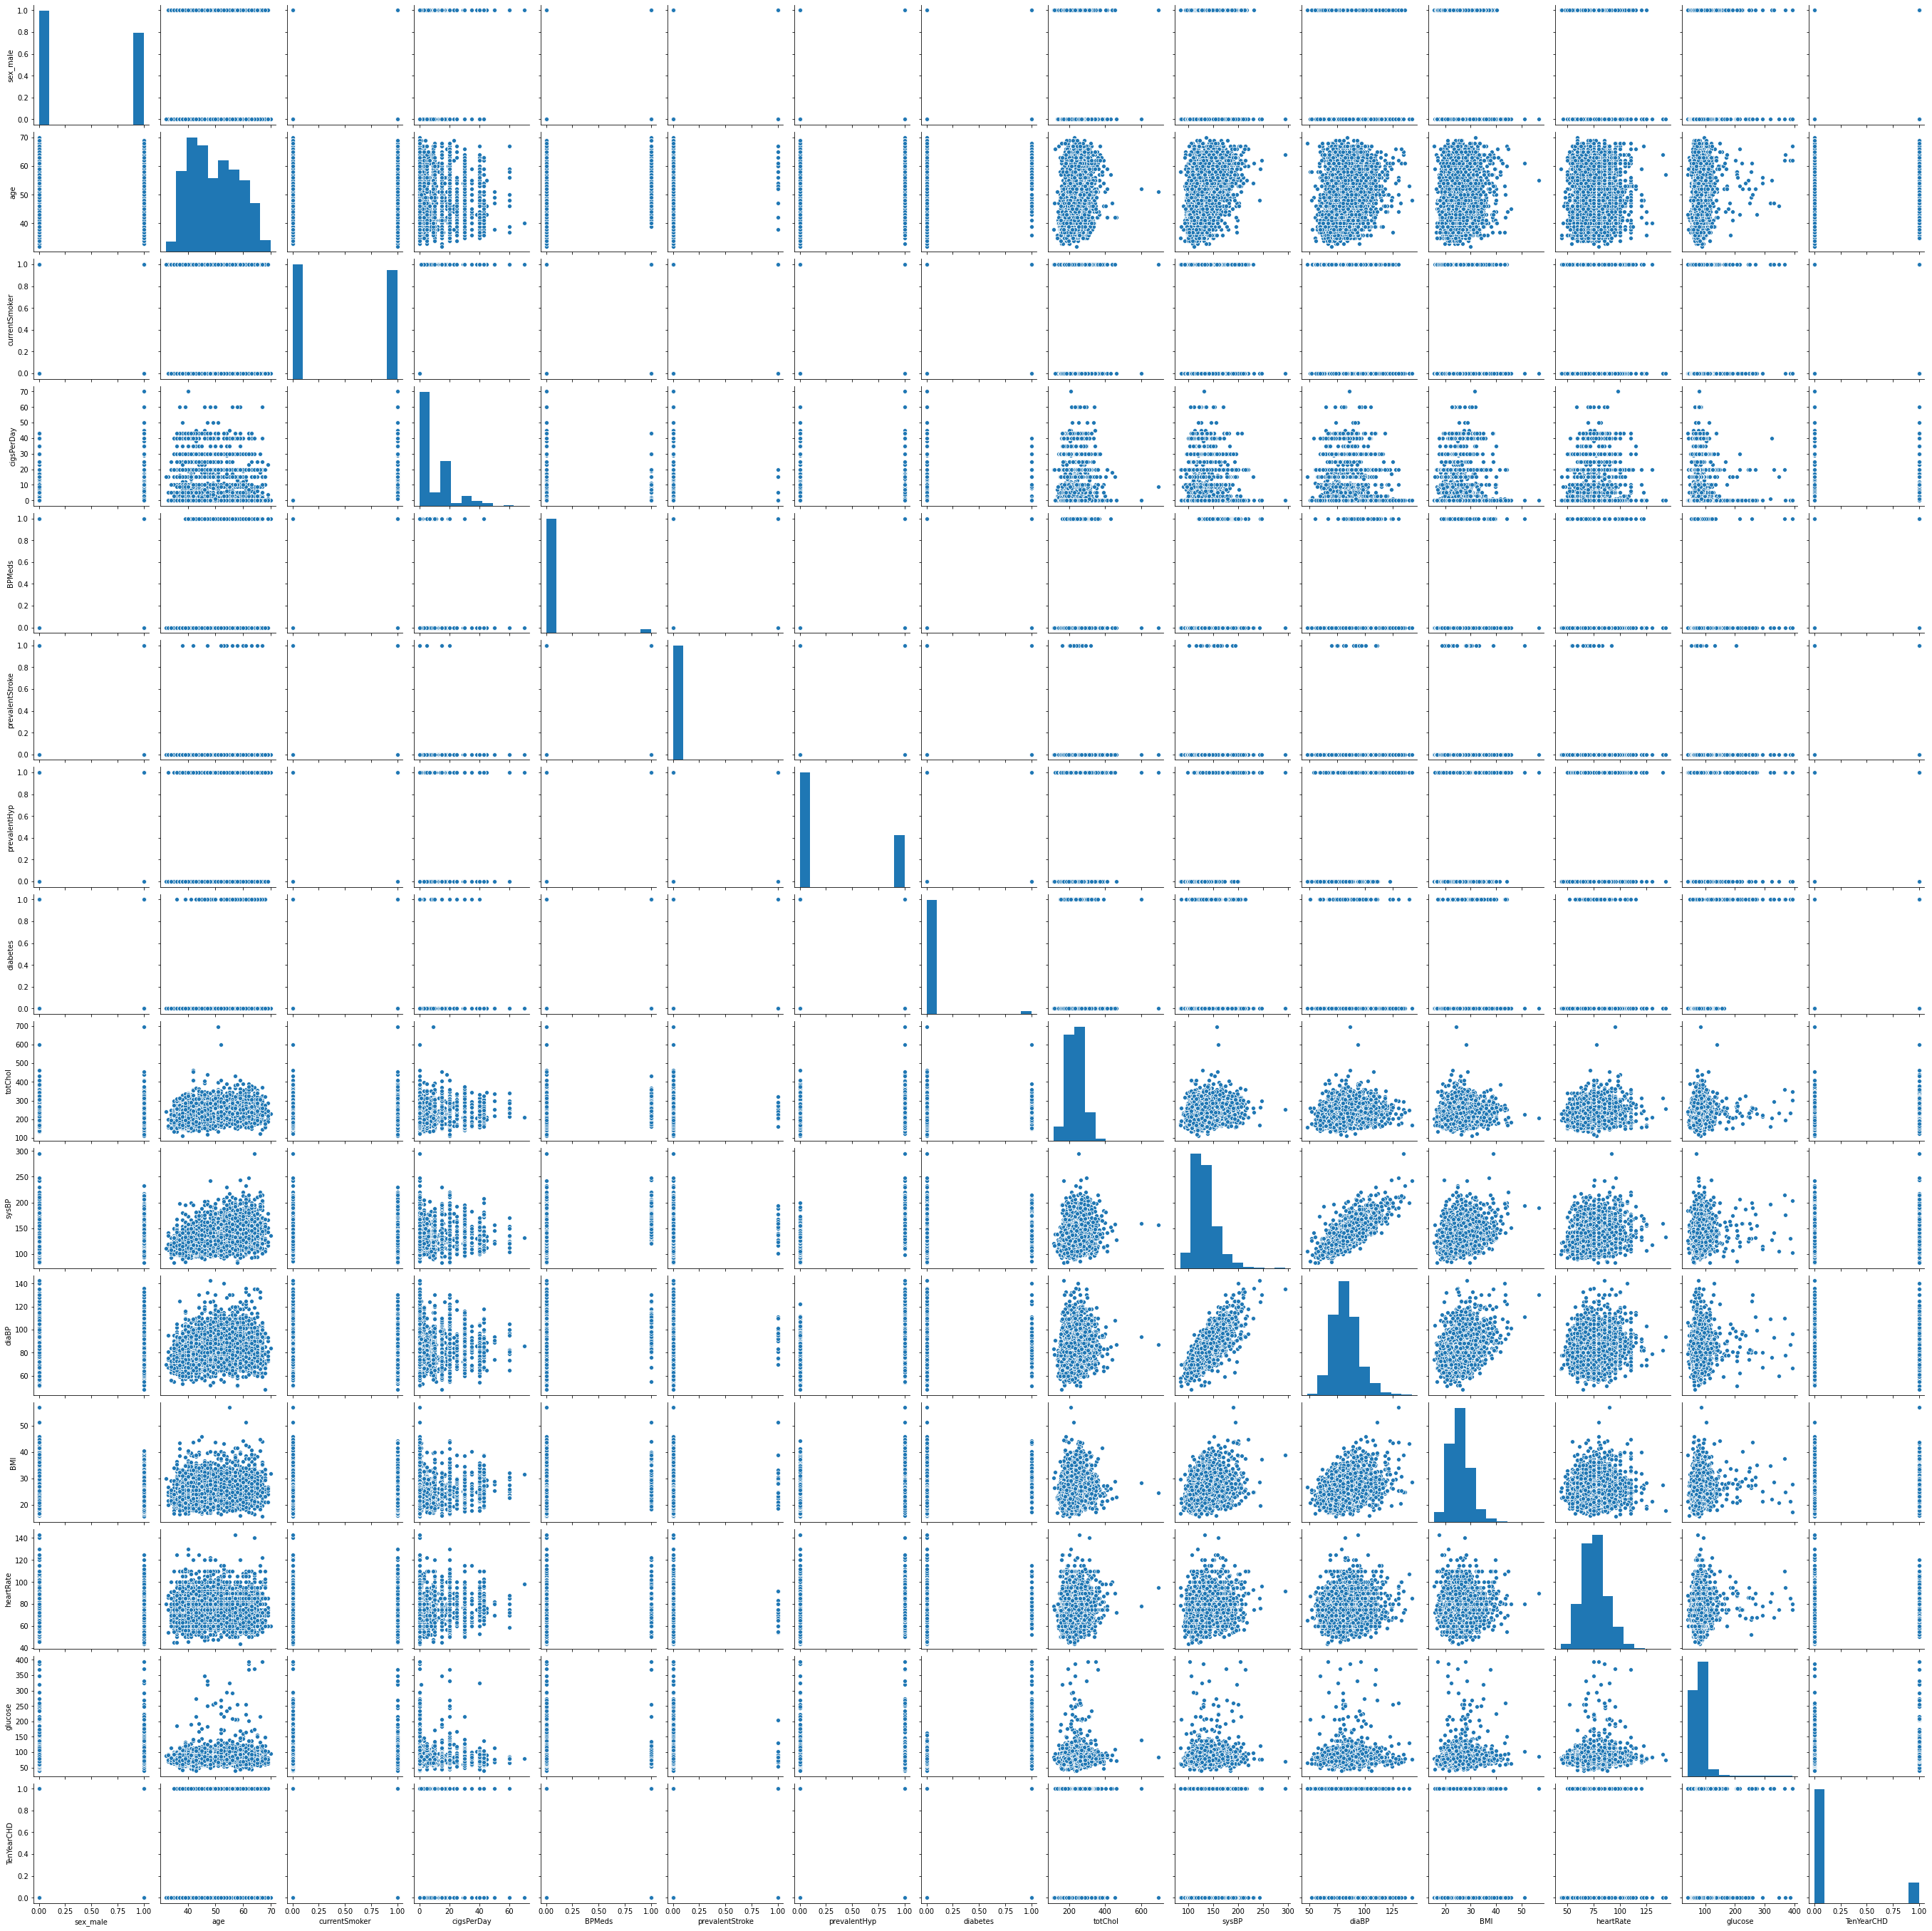

In [41]:
sn.pairplot(data=heart_df)

In [42]:
heart_df.describe()

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [43]:
#Process of Logistic Regression
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()

,const,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [44]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq,df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           14
Date:                Sat, 09 May 2020   Pseudo R-squ.:                  0.1170
Time:                        03:53:49   Log-Likelihood:                -1414.3
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.439e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6532      0.687    -12.589      0.000     -10.000      -7.306
sex_male            0.5742      0.107      5.345      0.000       0.364       0.785
age                 0.0641      0.007      9.799      0.000       0.051       0.077
currentSmoker       0.0739      0.155      0.478      0.633      -0.229       0.377
cigsPerDay          0.0184      0.006      3.000      0.003       0.006       0.030
BPMeds              0.1448      0.232      0.623      0.533      -0.310       0.600
prevalentStroke     0.7193      0.489      1.471      0.141      -0.239       1.678
prevalentHyp        0.2142      0.136      1.571      0.116      -0.053       0.481
diabetes            0.0022      0.312      0.007      0.994      -0.610       0.614
totChol             0.0023      0.001      2.081      0.037       0.000       0.004
sysBP               0.0154      0.004      4.082      0.000       0.008       0.023
diaBP              -0.0040      0.006     -0.623      0.533      -0.016       0.009
BMI                 0.0103      0.013      0.827      0.408      -0.014       0.035
heartRate          -0.0023      0.004     -0.549      0.583      -0.010       0.006
glucose             0.0076      0.002      3.409      0.001       0.003       0.012
===================================================================================
"""

In [47]:
#Feature selection: Backward elimination
def back_feature_elem(data_frame,dep_var,col_list):
  while len(col_list)>0:
    model=sm.Logit(dep_var,data_frame[col_list])
    result=model.fit(dispo=0)
    largest_pvalue=round(result.pvalues,3).nlargest(1)
    if largest_pvalue[0]<(0.05):
        return result
        break
    else:
        col_list=col_list.drop(largest_pvalue.index)
result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)

Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377067
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377105
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377161
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377221
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377280
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377593
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377958
         Iterations 7


In [48]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Sat, 09 May 2020   Pseudo R-squ.:                  0.1149
Time:                        04:25:11   Log-Likelihood:                -1417.7
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.127e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1264      0.468    -19.504      0.000     -10.043      -8.209
sex_male       0.5815      0.105      5.524      0.000       0.375       0.788
age            0.0655      0.006     10.343      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.805      0.000       0.012       0.028
totChol        0.0023      0.001      2.106      0.035       0.000       0.004
sysBP          0.0174      0.002      8.162      0.000       0.013       0.022
glucose        0.0076      0.002      4.574      0.000       0.004       0.011
==============================================================================
"""

In [51]:
#interpreting the results
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))


            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000043       0.000272    0.000109   0.000
sex_male        1.455242       2.198536    1.788687   0.000
age             1.054483       1.080969    1.067644   0.000
cigsPerDay      1.011733       1.028128    1.019897   0.000
totChol         1.000158       1.004394    1.002273   0.035
sysBP           1.013292       1.021784    1.017529   0.000
glucose         1.004346       1.010898    1.007617   0.000


In [62]:
#splitting training and testing data
import sklearn
new_features=heart_df[['age','sex_male','cigsPerDay','totChol','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)
print(x)
print(y)

      age  sex_male  cigsPerDay  totChol  glucose
0      39         1         0.0    195.0     77.0
1      46         0         0.0    250.0     76.0
2      48         1        20.0    245.0     70.0
3      61         0        30.0    225.0    103.0
4      46         0        23.0    285.0     85.0
...   ...       ...         ...      ...      ...
4233   50         1         1.0    313.0     86.0
4234   51         1        43.0    207.0     68.0
4237   52         0         0.0    269.0    107.0
4238   40         1         0.0    185.0     72.0
4239   39         0        30.0    196.0     80.0

[3751 rows x 5 columns]
0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3751, dtype: int64


In [0]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [65]:
 #Model Accuracy
 sklearn.metrics.accuracy_score(y_test,y_pred)

0.877496671105193

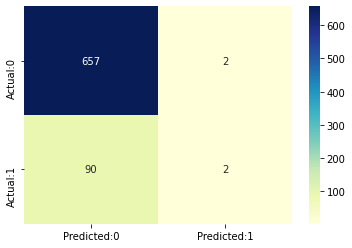

In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0', 'Actual:1'])
sn.heatmap(conf_matrix, annot=True,fmt= 'd', cmap= "YlGnBu " )